## DGMD S-17 Robotics, Autonomous Vehicles, Drones, and Artificial Intelligence

### Object Detection, Depth Perception and Adaptive Navigation with a Tello Drone

### Group Members: Ryan Abbate, Eumar Assis, Muthukaruppan (Muthu) Annamalai

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import seaborn as sns

## Load Telemetry data frame

In [82]:
#Load Telemetry Data File - First Version
df = pd.read_csv("./assets/telemetry.csv")

df["version"] = "1"

#Load Telemetry Data File - Second Version (color intensity only for bounding boxes)
df_v2 = pd.read_csv("./assets/telemetry_v2.csv")

df_v2["version"] = "2"

# Merge two data frames
df = pd.concat([df, df_v2], axis=0)

#Rename Columns
if not 'total_intensity' in list(df.columns):
    df_c = df[df['Model'] == 'DepthPerception'][['log_time', 'confidence']].rename(columns={'log_time': 'log_time', 'confidence': 'total_intensity'})
    df = pd.merge(df, df_c, on='log_time')

# DepthPerception does not provide confidence level
df.loc[df['Model'] == 'DepthPerception', 'confidence'] = 0

# Only DepthPerception should have confidence level
df.loc[df['Model'] != 'DepthPerception', 'total_intensity'] = 0

df['box_x_min'] = df['model output xcenter'] - (df['detected bounding box width'] / 2)
df['box_x_max'] = df['model output xcenter'] + (df['detected bounding box width'] / 2)
df['box_y_min'] = df['model output ycenter'] - (df['detected bounding box height'] / 2)
df['box_y_max'] = df['model output ycenter'] + (df['detected bounding box height'] / 2)

print(df.columns)
# df.describe()
df

Index(['log_time', 'Model', 'confidence', 'detected bounding box width',
       'detected bounding box height', 'img xcenter', 'img ycenter',
       'model output xcenter', 'model output ycenter',
       'height (distance to floor)', 'is_flying', 'version', 'total_intensity',
       'box_x_min', 'box_x_max', 'box_y_min', 'box_y_max'],
      dtype='object')


,log_time,Model,confidence,detected bounding box width,detected bounding box height,img xcenter,img ycenter,model output xcenter,model output ycenter,height (distance to floor),is_flying,version,total_intensity,box_x_min,box_x_max,box_y_min,box_y_max
0,2022-08-02 12:17:20.532976,YOLOObjectDetector,0.692772,676.316956,555.245911,480.0,360.0,519.071777,433.902924,0,False,1,0.0,180.913300,857.230255,156.279968,711.525879
1,2022-08-02 12:17:20.532976,DepthPerception,0.000000,NaN,NaN,480.0,360.0,NaN,NaN,0,False,1,243017952.0,NaN,NaN,NaN,NaN
2,2022-08-02 12:17:20.532976,AzureObjectDetector,0.920000,604.000000,560.000000,480.0,360.0,97.500000,76.000000,0,False,1,0.0,-204.500000,399.500000,-204.000000,356.000000
3,2022-08-02 12:22:13.813549,YOLOFaceDetector,0.947042,229.000000,377.000000,480.0,360.0,179.500000,-3.000000,0,False,1,0.0,65.000000,294.000000,-191.500000,185.500000
4,2022-08-02 12:22:13.813549,YOLOObjectDetector,0.586069,913.993164,718.340942,480.0,360.0,492.926575,360.829529,0,False,1,0.0,35.929993,949.923157,1.659058,720.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,2022-08-03 14:43:27.359103,AzureObjectDetector,0.872000,452.000000,390.000000,480.0,360.0,55.500000,162.500000,0,False,2,0.0,-170.500000,281.500000,-32.500000,357.500000
731,2022-08-03 14:43:33.735441,YOLOFaceDetector,0.572569,140.000000,170.000000,480.0,360.0,183.500000,199.500000,0,False,2,0.0,113.500000,253.500000,114.500000,284.500000
732,2022-08-03 14:43:33.735441,YOLOObjectDetector,0.775029,451.402649,367.198425,480.0,360.0,321.185455,535.024902,0,False,2,0.0,95.484131,546.886780,351.425690,718.624115
733,2022-08-03 14:43:33.735441,DepthPerception,0.000000,NaN,NaN,480.0,360.0,NaN,NaN,0,False,2,10253911.0,NaN,NaN,NaN,NaN


## 1. Comparing Azure vs. YOLO 

Comparing people detector models

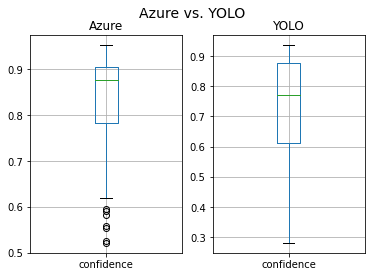

In [83]:
#Get filtered data frames
azure_df = df[df['Model'] =='AzureObjectDetector'] 

yolo_df = df[df['Model'] == 'YOLOObjectDetector']

# Plot two histograms side by side using Matplotlib
fig, axes = plt.subplots(1, 2)

fig.suptitle('Azure vs. YOLO', fontsize=14)

azure_df.boxplot('confidence', ax=axes[0])
axes[0].set_title('Azure')
yolo_df.boxplot('confidence', ax=axes[1])
axes[1].set_title('YOLO')
plt.show()



## 2. Comparing YOLO Face vs. YOLO

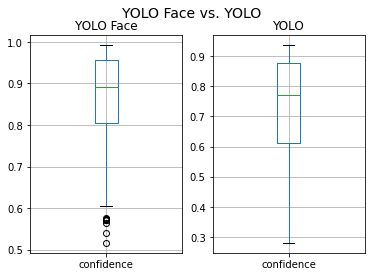

In [84]:
#Get filtered data frames
yolo_face_df = df[df['Model'] == 'YOLOFaceDetector']

# Plot two histograms side by side using Matplotlib
fig, axes = plt.subplots(1, 2)
fig.suptitle('YOLO Face vs. YOLO', fontsize=14)
yolo_face_df.boxplot('confidence', ax=axes[0])
axes[0].set_title('YOLO Face')
yolo_df.boxplot('confidence', ax=axes[1])
axes[1].set_title('YOLO')
plt.show()

## 3. Model Accuracy Histogram

Comparing accuracy of 1. YOLO, 2. YOLO Face & 3. Azure Models

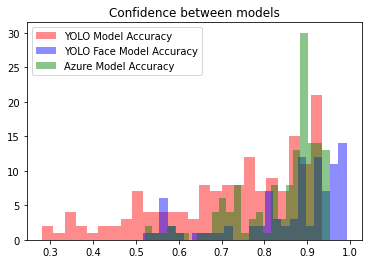

In [85]:
# plotting two histograms on the same axis
plt.hist(yolo_df['confidence'], bins=25, alpha=0.45, color='red')
plt.hist(yolo_face_df['confidence'], bins=25, alpha=0.45, color='blue')
plt.hist(azure_df['confidence'], bins=25, alpha=0.45, color='green')

plt.title("Confidence between models")
plt.legend(['YOLO Model Accuracy',
            'YOLO Face Model Accuracy',
            'Azure Model Accuracy'])
  
plt.show()

## 4. Finding person distance from camera

Comparing Computer Vision bounding boxes vs. density

Text(0, 0.5, 'Accuracy')

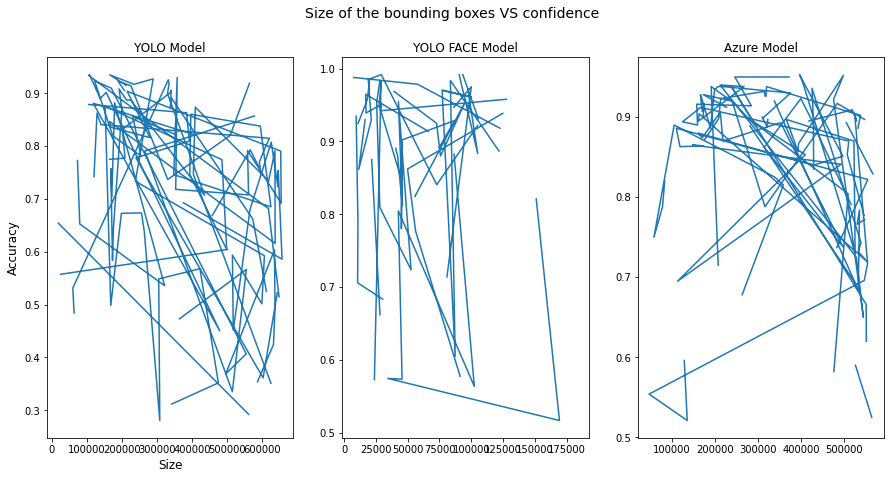

In [86]:
# Plotting the Graph
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
fig.figsize=(10, 10)
fig.suptitle('Size of the bounding boxes VS confidence', fontsize=14)
axs[0].plot(yolo_df['detected bounding box width'] * yolo_df['detected bounding box height'], yolo_df.confidence)
axs[0].set_title("YOLO Model")


axs[1].plot(yolo_face_df['detected bounding box width'] * yolo_face_df['detected bounding box height'], yolo_face_df.confidence)
axs[1].set_title("YOLO FACE Model")

axs[2].plot(azure_df['detected bounding box width'] * azure_df['detected bounding box height'], azure_df.confidence)
axs[2].set_title("Azure Model")

axs[0].set_xlabel("Size", fontsize=12)
axs[0].set_ylabel("Accuracy", fontsize=12)
# plt.show()

## 5. Finding Distance from the camera using correlation between Color Density vs. Bounding Box Sizes

Results indicate some level of correlation:

 - 25% positive correlation between color density and bounding box size when using the entire image.
 - 36% positive correlation between color density and bounding box size when using only the detected face's bounding box for color density.

Therefore, we can combine these two metrics to measure user distance from the camera.


Text(0.5, 1.0, 'V2: Density for Face')

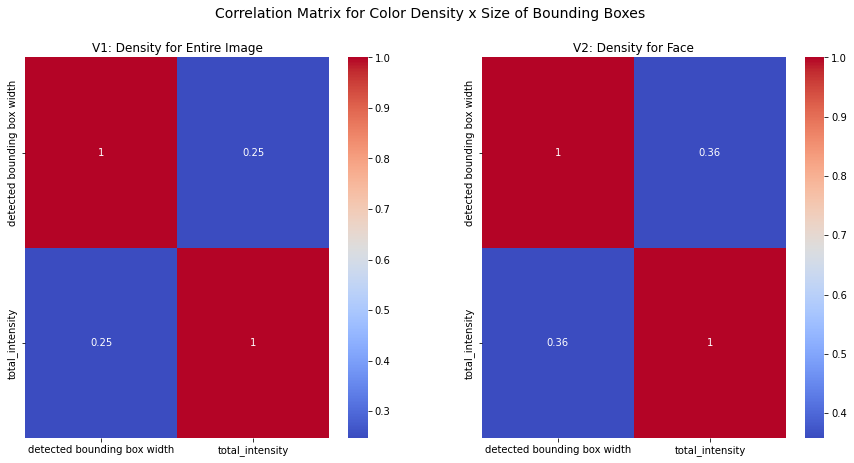

In [87]:
#Get YOLO face detector and depth perception models
from matplotlib.pyplot import title


df_comparing_model = df[df['Model'].isin(['YOLOFaceDetector', 'DepthPerception' ])]

#Group by timestamp to keep results from both models in one row (collapse)
df_comparing_model_v1 = df[df['version'] == '1'].groupby("log_time").mean()[['detected bounding box width', 'total_intensity']]

df_comparing_model_v2 = df[df['version'] == '2'].groupby("log_time").mean()[['detected bounding box width', 'total_intensity']]

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

fig.suptitle('Correlation Matrix for Color Density x Size of Bounding Boxes', fontsize=14)

sns.heatmap(df_comparing_model_v1.corr(), ax=axs[0], annot = True, fmt='.2g',cmap= 'coolwarm')
sns.heatmap(df_comparing_model_v2.corr(), ax=axs[1], annot = True, fmt='.2g',cmap= 'coolwarm')

axs[0].set_title("V1: Density for Entire Image")
axs[1].set_title("V2: Density for Face")


## 6. Accuracy & Distance Bar plot

This doesn't make sense we can ignore this

Text(0, 0.5, 'Accuracy')

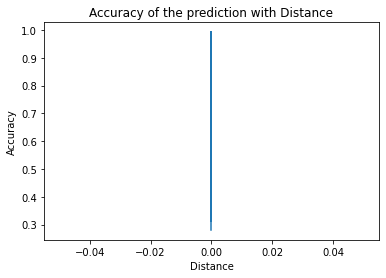

In [88]:
# Plotting the Graph
df_det = df[df['Model'] != 'DepthPerception']
plt.plot(df_det.total_intensity/100000000, df_det.confidence)
plt.title("Accuracy of the prediction with Distance")
plt.xlabel("Distance")
plt.ylabel("Accuracy")

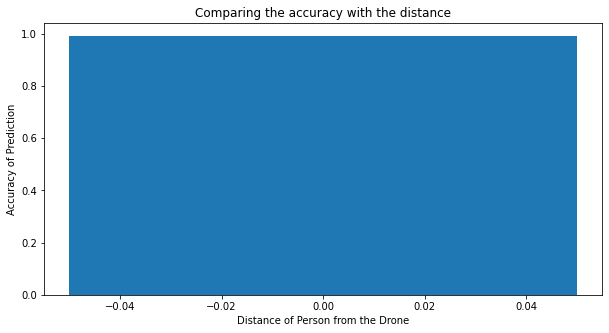

In [89]:
df_det = df[df['Model'] != 'DepthPerception']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_det.total_intensity/100000000, df_det.confidence, width = 0.1)
 
plt.xlabel("Distance of Person from the Drone")
plt.ylabel("Accuracy of Prediction")
plt.title("Comparing the accuracy with the distance")
plt.show()